```markdown
# Project Overview

This Jupyter Notebook is designed to facilitate the analysis and processing of image data using various Python libraries. The workflow includes data manipulation, visualization, and model building for image classification tasks.

## Libraries Used

The following libraries are imported and used in this notebook:

- **pandas**: Data manipulation and analysis
- **numpy**: Scientific computing and array operations
- **seaborn**: Data visualization based on matplotlib
- **matplotlib.pyplot**: Plotting and visualization
- **os**: Interacting with the operating system
- **cv2**: Image and video processing
- **glob**: Finding file paths matching a pattern
- **PIL**: Image processing (Python Imaging Library)
- **shutil**: File operations
- **skimage**: Image processing
- **nilearn**: Neuroimaging data processing
- **nibabel**: Reading and writing medical image files (NIfTI format)
- **keras**: Building neural network models
- **tensorflow**: Building neural network models
- **scikit-learn**: Machine learning utilities
```

In [10]:
import pandas as pd  # Bibliothèque pour la manipulation et l'analyse de données
import numpy as np  # Bibliothèque pour le calcul scientifique et les opérations sur les tableaux
import seaborn as sns  # Bibliothèque pour la visualisation de données basée sur matplotlib
import matplotlib.pyplot as plt  # Bibliothèque pour la création de graphiques et de visualisations

import os  # Module pour les interactions avec le système d'exploitation

import cv2  # Bibliothèque pour le traitement d'images et de vidéos

import glob  # Module pour trouver tous les chemins correspondant à un motif spécifique

import PIL  # Bibliothèque pour le traitement d'images (Python Imaging Library)

import shutil  # Module pour les opérations de fichiers et de collections de fichiers

import imageio # Bibliothèque pour la lecture et l'écriture d'images

from skimage import data  # Module pour accéder à des ensembles de données d'images de test

from skimage.util import montage  # Fonction pour créer une image de montage à partir d'une collection d'images

import skimage.transform as skTrans  # Module pour les transformations géométriques sur les images
from skimage.transform import rotate, resize  # Fonctions pour faire pivoter et redimensionner les images
from PIL import Image, ImageOps  # Classes et fonctions pour la manipulation d'images avec PIL

import nilearn as nl

import nibabel as nib  # Module pour la lecture et l'écriture de fichiers d'images médicales au format NIfTI

import nilearn.plotting as nlplt  # Module pour la visualisation d'images cérébrales avec nilearn

import gif_your_nifti.core as gif2nif  # Module pour la conversion de fichiers NIfTI en GIF

import keras  # Bibliothèque pour la construction de modèles de réseaux de neurones

from keras.layers import Flatten # Classe pour aplatir les entrées
import keras.backend as K  # Module pour les opérations de bas niveau sur les tenseurs
from keras.callbacks import CSVLogger  # Classe pour enregistrer l'historique de l'entraînement

import tensorflow as tf  # Bibliothèque pour la construction de modèles de réseaux de neurones

from tensorflow.keras.utils import plot_model  # Fonction pour tracer un modèle sous forme de graphe

from sklearn.preprocessing import MinMaxScaler  # Classe pour mettre à l'échelle les valeurs des caractéristiques

from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement et de test

from sklearn.metrics import classification_report # Fonctions pour évaluer les performances du modèle

from tensorflow.keras.models import * # Module pour les modèles de réseaux de neurones

from tensorflow.keras.layers import * # Module pour les couches de réseaux de neurones

from tensorflow.keras.optimizers import * # Module pour les optimiseurs de réseaux de neurones

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard # Classes de rappel pour les modèles de réseaux de neurones

from tensorflow.keras import layers # Module pour les couches de réseaux de neurones

np.set_printoptions(precision=3, suppress=True)  # Définit le nombre de chiffres après la virgule pour l'affichage des nombres flottants

```markdown
## Data Paths

In this notebook, we are using the following data paths:

- **Training Data Path:** `./data/train`
- **Validation Data Path:** `./data/validation`

These paths point to the directories containing the training and validation datasets, respectively.
```

In [11]:
# Récupère tous les dossiers dans le répertoire de données
data_dirs = [d for d in glob.glob('./data/*') if os.path.isdir(d)]

# Assigne le premier dossier trouvé comme dossier de formation et le deuxième comme dossier de validation
TRAINING_DATA = data_dirs[0] if len(data_dirs) > 0 else None
VALIDATION_DATA = data_dirs[1] if len(data_dirs) > 1 else None

print(f"Training directory: {TRAINING_DATA}")
print(f"Validation directory: {VALIDATION_DATA}")


Training directory: ./data\MICCAI_BraTS2020_TrainingData
Validation directory: ./data\MICCAI_BraTS2020_ValidationData


```markdown
## Image Data Visualization

In this section, we visualize different MRI modalities and their corresponding segmentation masks. The modalities include:

- **FLAIR**: Fluid-attenuated inversion recovery
- **T1**: T1-weighted image
- **T1CE**: T1-weighted image with contrast enhancement
- **T2**: T2-weighted image
- **Mask**: Segmentation mask

We use the middle slice of each 3D volume for visualization. The variable `slice_w` is used to adjust the slice index for better visualization.
```

In [12]:
test_image_flair = nib.load(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
test_image_t1 = nib.load(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
test_image_t1ce = nib.load(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
test_image_t2 = nib.load(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
test_mask = nib.load(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()


```markdown
## Image Data Loading

In this section, we load the MRI modalities and their corresponding segmentation masks for a sample patient from the training dataset. The modalities include:

- **FLAIR**: Fluid-attenuated inversion recovery
- **T1**: T1-weighted image
- **T1CE**: T1-weighted image with contrast enhancement
- **T2**: T2-weighted image
- **Mask**: Segmentation mask

The data is loaded using the `nibabel` library, which allows us to read medical image files in the NIfTI format. The loaded data is stored in the following variables:

- `test_image_flair`
- `test_image_t1`
- `test_image_t1ce`
- `test_image_t2`
- `test_mask`

These variables contain the 3D volumes of the respective MRI modalities and the segmentation mask.
```

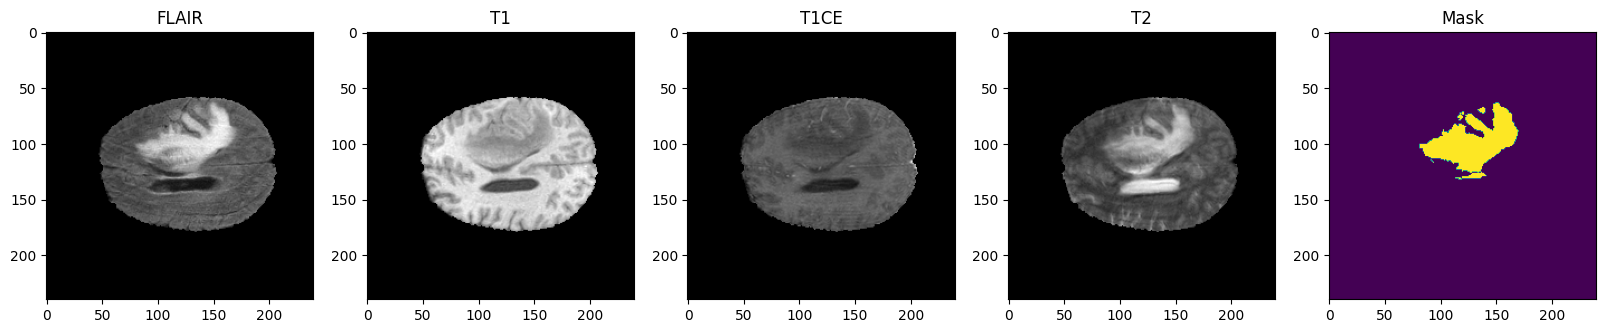

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 10))
slice_w = 25
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap='gray')
ax1.set_title('FLAIR')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap='gray')
ax2.set_title('T1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap='gray')
ax3.set_title('T1CE')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap='gray')
ax4.set_title('T2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')
plt.show()


```markdown
## Visualization of MRI Modalities

In this section, we visualize different MRI modalities and their corresponding segmentation masks. The modalities include:

- **FLAIR**: Fluid-attenuated inversion recovery
- **T1**: T1-weighted image
- **T1CE**: T1-weighted image with contrast enhancement
- **T2**: T2-weighted image
- **Mask**: Segmentation mask

We use the middle slice of each 3D volume for visualization. The variable `slice_w` is used to adjust the slice index for better visualization.

The following variables are used for visualization:

- `fig`: The figure object for plotting.
- `ax1`, `ax2`, `ax3`, `ax4`, `ax5`: The axes objects for each subplot.
- `slice_w`: The slice index for visualization.
- `test_image_flair`, `test_image_t1`, `test_image_t1ce`, `test_image_t2`, `test_mask`: The 3D volumes of the respective MRI modalities and the segmentation mask.
```

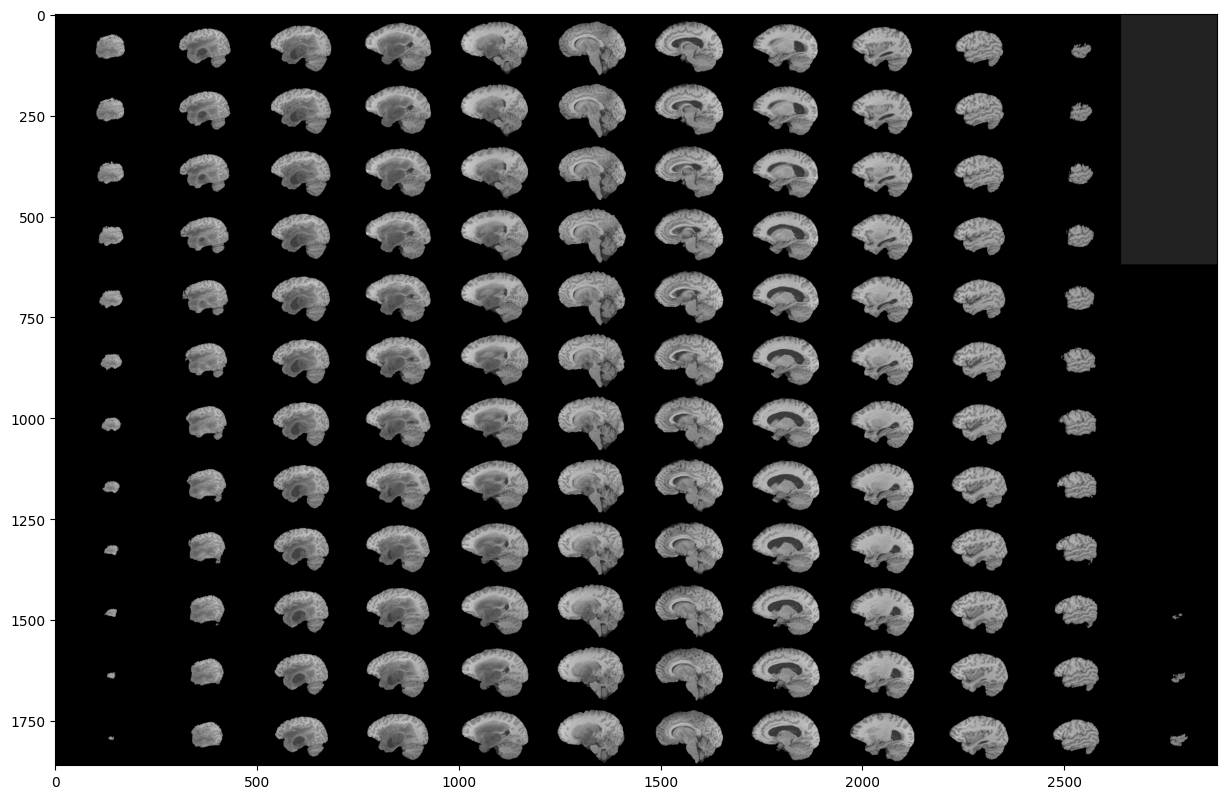

In [14]:
# Skip 50:50 slice for better visualization
fig, ax1 = plt.subplots(1, 1, figsize = (15, 15))
ax1.imshow(rotate(montage(test_image_t1[50:-50,:,:]), 90, resize=True), cmap='gray')

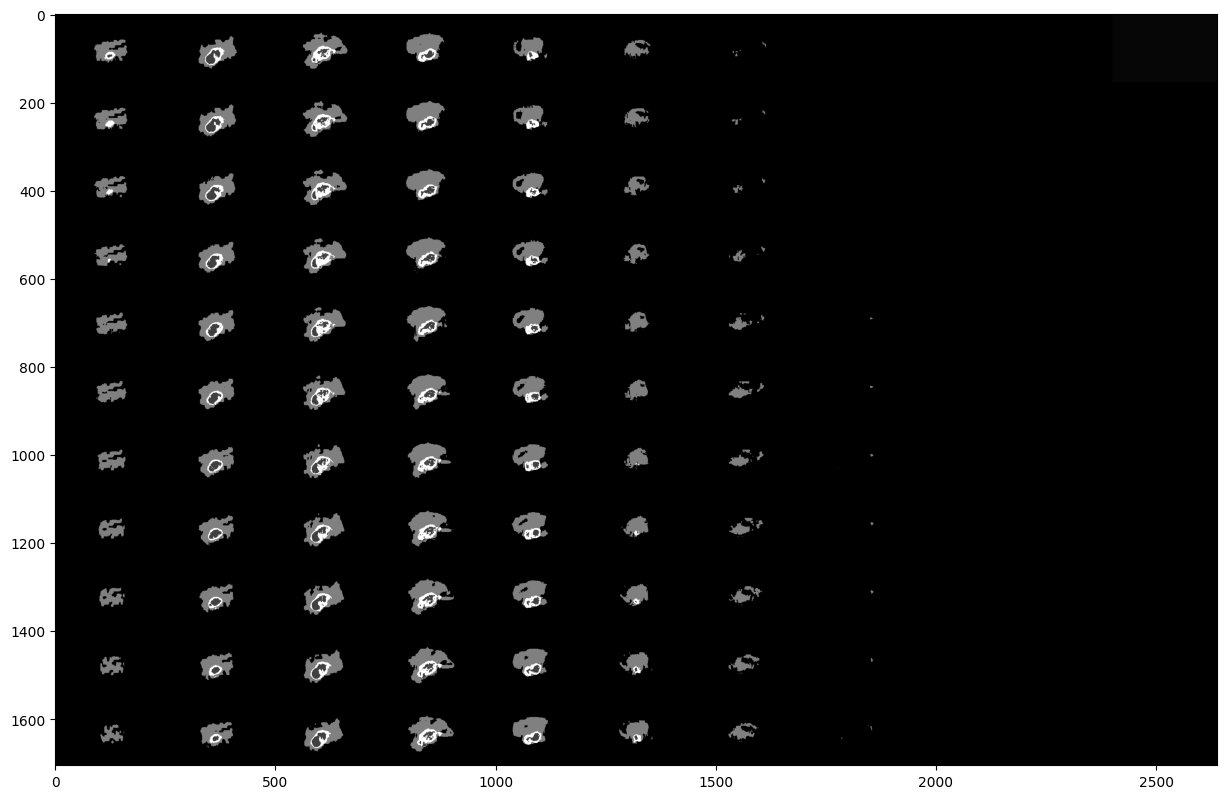

In [15]:
# Skip 50:50 slice for better visualization
fig, ax5 = plt.subplots(1, 1, figsize = (15, 15))
ax5.imshow(rotate(montage(test_mask[60:-60,:,:]), 90, resize=True), cmap='gray')

```markdown
## MRI Data Visualization

In this section, we visualize different MRI modalities and their corresponding segmentation masks. The modalities include:

- **FLAIR**: Fluid-attenuated inversion recovery
- **T1**: T1-weighted image
- **T1CE**: T1-weighted image with contrast enhancement
- **T2**: T2-weighted image
- **Mask**: Segmentation mask

We use the middle slice of each 3D volume for visualization. The variable `slice_w` is used to adjust the slice index for better visualization.

### Variables Used

- **TRAINING_DATA**: Path to the training data directory.
- **VALIDATION_DATA**: Path to the validation data directory.
- **fig**: The figure object for plotting.
- **ax1, ax2, ax3, ax4, ax5**: The axes objects for each subplot.
- **slice_w**: The slice index for visualization.
- **test_image_flair, test_image_t1, test_image_t1ce, test_image_t2, test_mask**: The 3D volumes of the respective MRI modalities and the segmentation mask.
- **image_data**: The data from the NIfTI file.
- **num_slices**: The number of slices in the 3D volume.
- **axes**: The axes objects for the subplots in the GIF visualization.
- **nii_file_path**: Path to the NIfTI file.
- **nii_image**: The NIfTI image object.
- **slice_idx**: The index of the slice being visualized.
```

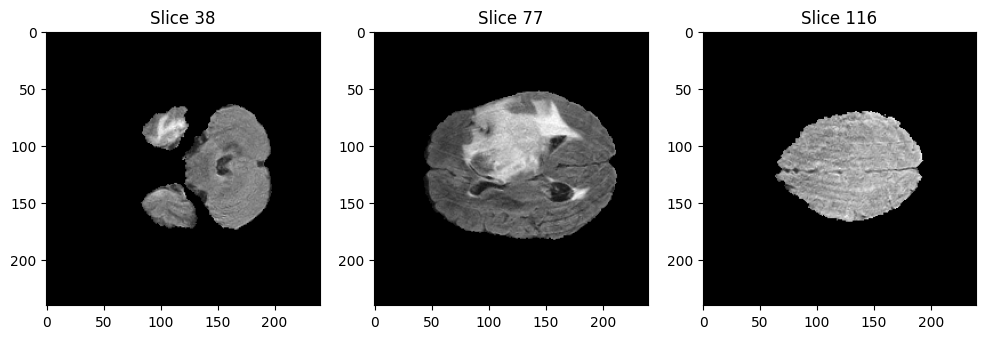

In [16]:
shutil.copy2(TRAINING_DATA +'/BraTS20_Training_001/BraTS20_Training_001_flair.nii', './data/gif_BraTS20_Training_001_flair.nii')
gif2nif.write_gif_normal('./data/gif_BraTS20_Training_001_flair.nii')

nii_file_path = './data/gif_BraTS20_Training_001_flair.nii'
nii_image = nib.load(nii_file_path)

image_data = nii_image.get_fdata()

num_slices = image_data.shape[2]

fig, axes = plt.subplots(1,3, figsize=(12, 4))
for i, slice_idx in enumerate([int(num_slices/4), int(num_slices/2), int(3*num_slices/4)]):
    axes[i].imshow(image_data[:, :, slice_idx], cmap='gray')
    axes[i].set_title(f'Slice {slice_idx}')

plt.show()


C:\Users\perax\AppData\Local\Temp\ipykernel_24412\200016297.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_image.append(imageio.imread(f'./data/gif_image.png'))


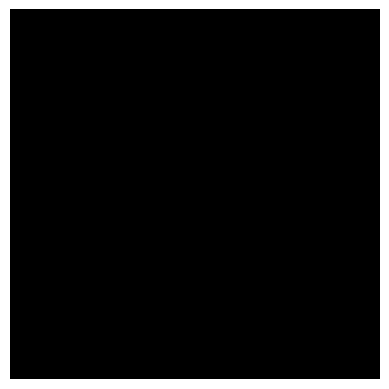

In [20]:
gif_image = []

for i in range(image_data.shape[2]):
    plt.imshow(image_data[:, :, i], cmap='gray')
    plt.axis('off')

    plt.savefig(f'./data/gif_image.png')

    gif_image.append(imageio.imread(f'./data/gif_image.png'))

imageio.mimsave('brain_slices.gif', gif_image, fps=30, loop=0)
plt.show()

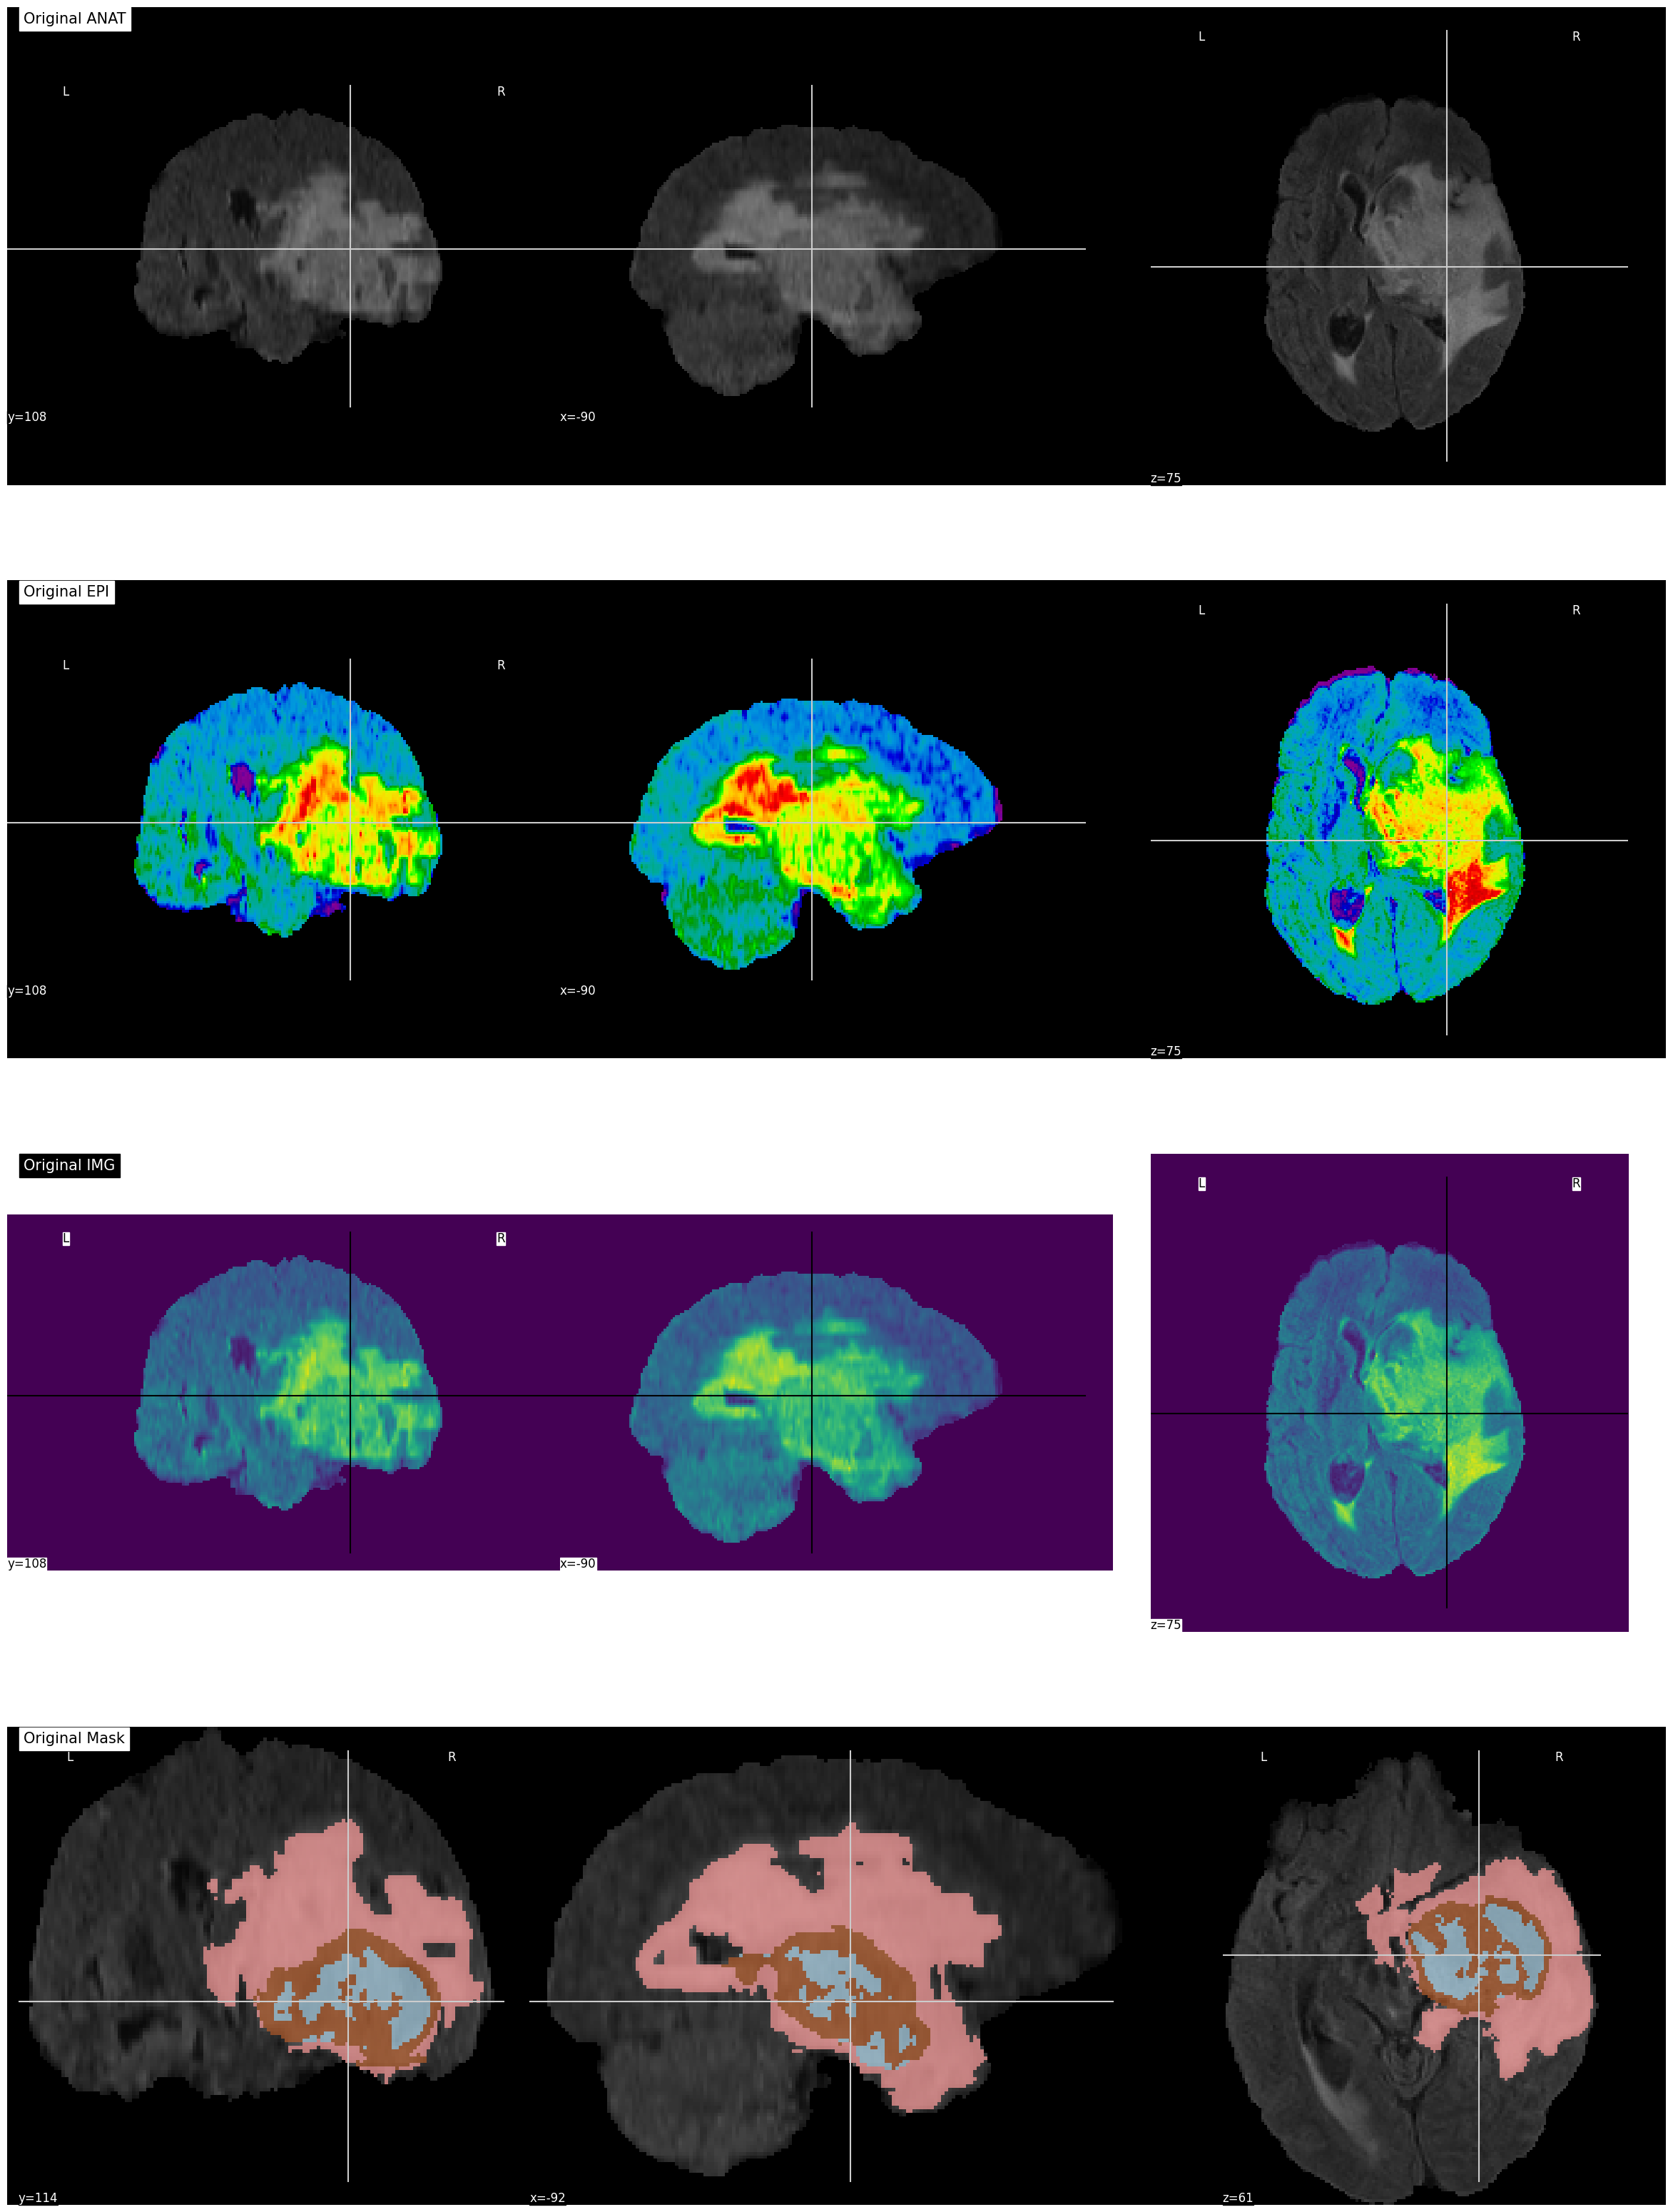

In [18]:
niimg = nl.image.load_img(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_flair.nii')
nimask = nl.image.load_img(TRAINING_DATA + '/BraTS20_Training_001/BraTS20_Training_001_seg.nii')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))

nlplt.plot_anat(niimg, title="Original ANAT", axes=axes[0])
nlplt.plot_epi(niimg, title="Original EPI", axes=axes[1])
nlplt.plot_img(niimg, title="Original IMG", axes=axes[2])
nlplt.plot_roi(nimask, bg_img=niimg, title="Original Mask", axes=axes[3], cmap='Paired')

plt.show()
